In [1]:
#integrantes: GABRIEL GOMEZ, EDUARDO DE LA HOZ, STEPHANIA DE LA HOZ

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.linalg as la
import sys
import mpl_toolkits.mplot3d as mpl
from numpy import genfromtxt
from collections import Counter
from sklearn.preprocessing import StandardScaler


In [3]:
def cleaner(df,k):
    return df[(abs(df[0]-np.mean(df[0])) <= k*np.std(df[0])) & (abs(df[1]-np.mean(df[1])) <= k*np.std(df[1])) & (abs(df[2]-np.mean(df[2])) <= k*np.std(df[2])) & (abs(df[3]-np.mean(df[3])) <= k*np.std(df[3]))]

In [4]:
df=pd.read_table('irisdata.txt',skiprows=9,header=None)
dfClean=df
cat=df.iloc[:,4].values
df=df.drop(columns=4)
rawdata=np.array(df)
covRawData = np.cov(rawdata.T)
resultRaw = la.eig(covRawData)
eugenVector=resultRaw[1]
eugenValors=resultRaw[0].real

In [5]:
covRawData

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

In [6]:
eugenValors

array([4.22484077, 0.24224357, 0.07852391, 0.02368303])

In [7]:
eugenVector

array([[ 0.36158968, -0.65653988, -0.58099728,  0.31725455],
       [-0.08226889, -0.72971237,  0.59641809, -0.32409435],
       [ 0.85657211,  0.1757674 ,  0.07252408, -0.47971899],
       [ 0.35884393,  0.07470647,  0.54906091,  0.75112056]])

In [8]:
sumEugen=np.sum(eugenValors)
porEugen=eugenValors/sumEugen
porEugen=porEugen*100

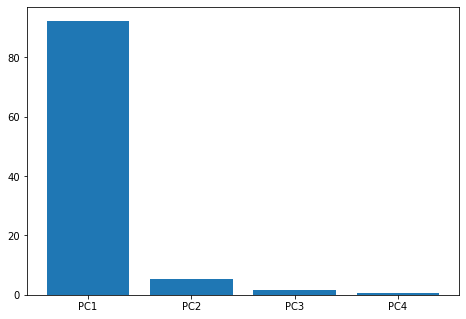

In [9]:
x=np.arange(4)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
lang=['PC1','PC2','PC3','PC4']
ax.bar(lang,porEugen)
plt.show()

In [10]:
eugenPares=[(np.abs(eugenValors[i]),eugenVector[:,i])for i in range(len(eugenValors))]

zerros=np.zeros((4,1))
matrix1D=np.hstack((eugenPares[0][1].reshape(4,1),zerros.reshape(4,1)))
matrix2D=np.hstack((eugenPares[0][1].reshape(4,1),eugenPares[1][1].reshape(4,1)))
matrix3D=np.hstack((eugenPares[0][1].reshape(4,1),eugenPares[1][1].reshape(4,1),eugenPares[2][1].reshape(4,1)))

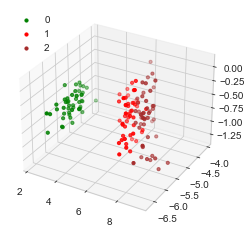

In [11]:
z=rawdata.dot(matrix3D)
lab=(0,1,2)
color=('green','red','brown')
with plt.style.context('seaborn-whitegrid'):
    fig=plt.figure()
    ax=fig.add_subplot(111,projection='3d')
    for lab, color in zip(lab,color):
        ax.scatter(z[cat==lab,0],z[cat==lab,1],z[cat==lab,2],c=color,s=10,label=lab)
    plt.legend(loc=2)
    plt.show()

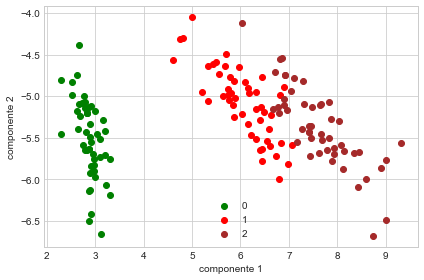

In [12]:
y=rawdata.dot(matrix2D)
lab2=(0,1,2)
color2=('green','red','brown')
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6,4))
    for lab2, color2, in zip(lab2,color2):
        plt.scatter(y[cat==lab2,0],y[cat==lab2,1],label=lab2,c=color2)
    plt.xlabel('componente 1')
    plt.ylabel('componente 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

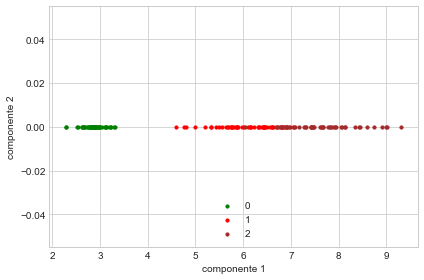

In [13]:
v=rawdata.dot(matrix1D)
lab3=(0,1,2)
color3=('green','red','brown')
with plt.style.context('seaborn-whitegrid'):
    plt.figure()
    for lab3, color3, in zip(lab3,color3):
        plt.scatter(v[cat==lab3,0],v[cat==lab3,1],label=lab3,c=color3,s=10)
    plt.xlabel('componente 1')
    plt.ylabel('componente 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

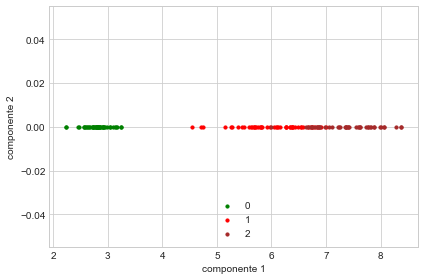

In [14]:
k=2
cleanDf=cleaner(dfClean,k)
catClean=cleanDf.iloc[:,4].values
cleanDf=cleanDf.drop(columns=4)
cleanData=np.array(cleanDf)
covCleanData = np.cov(cleanData.T)
resultClean = la.eig(covCleanData)
eugenVectorClean=resultClean[1]
eugenValorsClean=resultClean[0].real
eugenParesClean=[(np.abs(eugenValorsClean[i]),eugenVectorClean[:,i])for i in range(len(eugenValorsClean))]

zerros=np.zeros((4,1))
matrix1DClean=np.hstack((eugenParesClean[0][1].reshape(4,1),zerros.reshape(4,1)))

vClean=cleanData.dot(matrix1DClean)
lab4=(0,1,2)
color4=('green','red','brown')
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6,4))
    for lab4, color4, in zip(lab4,color4):
        plt.scatter(vClean[catClean==lab4,0],vClean[catClean==lab4,1],label=lab4,c=color4,s=10)
    plt.xlabel('componente 1')
    plt.ylabel('componente 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()